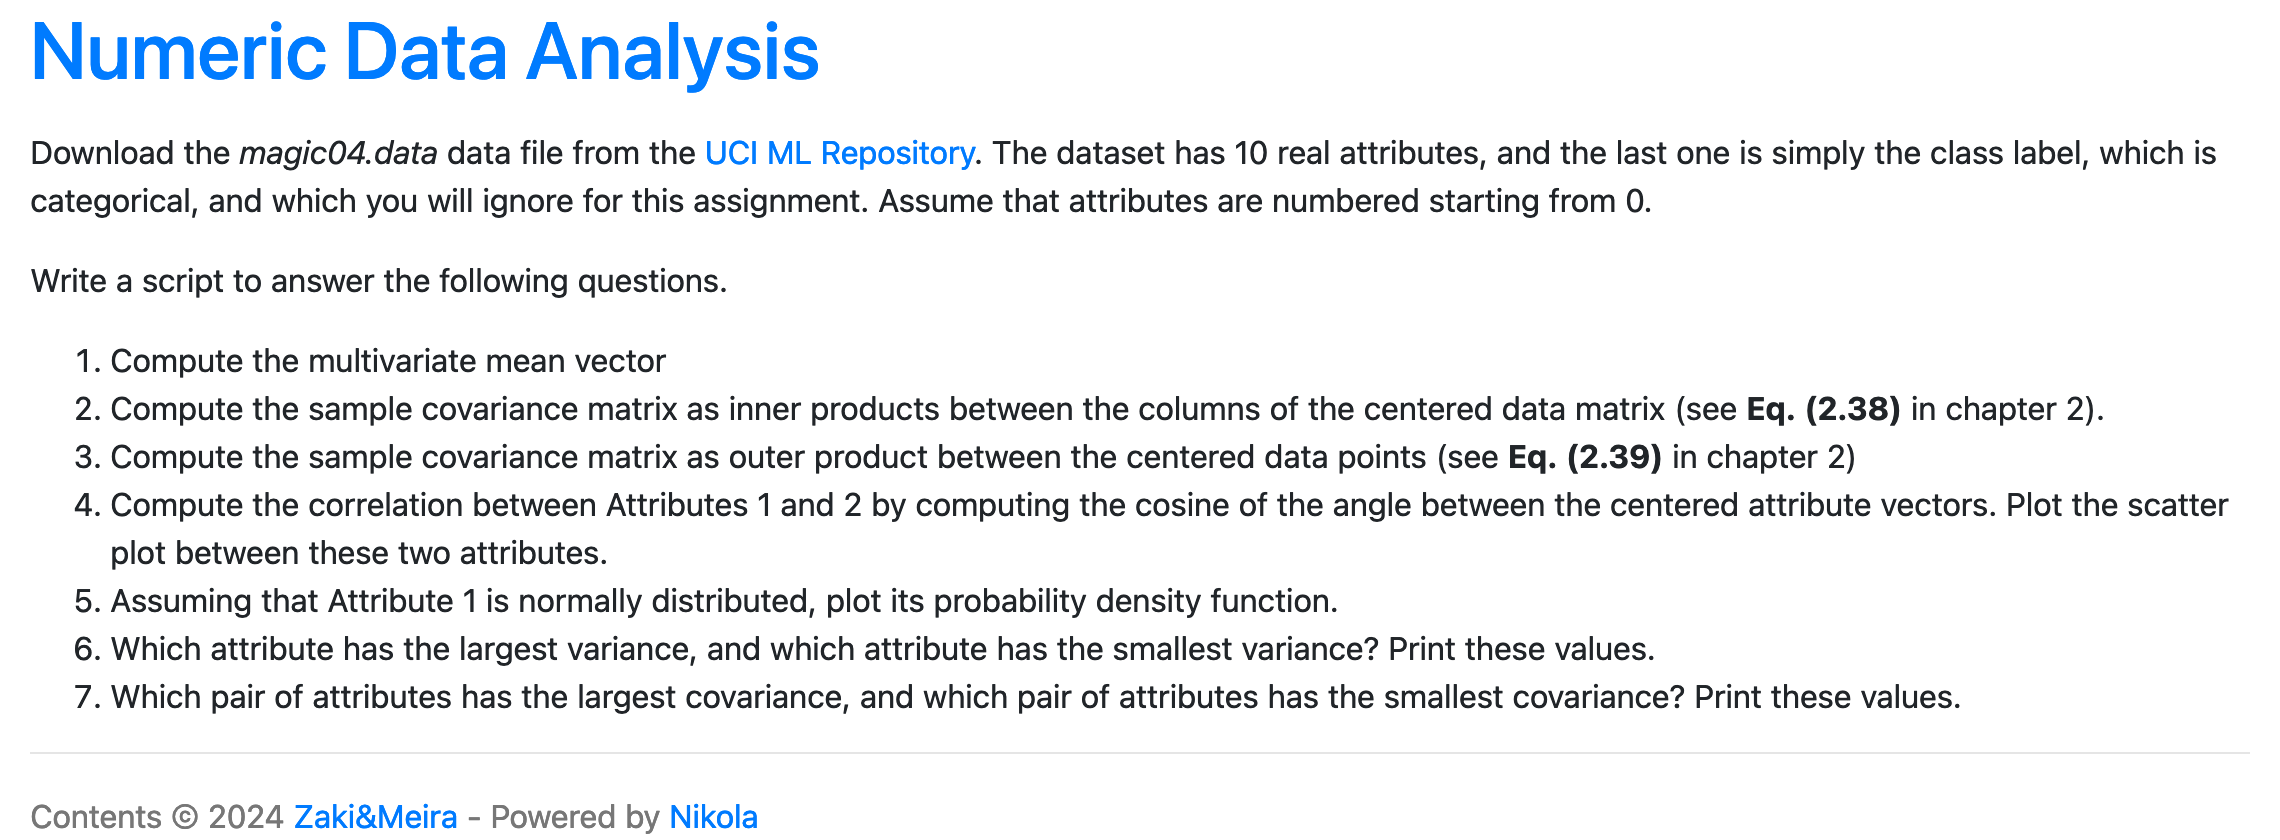

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/magic+gamma+telescope/magic04.data', header=None)
df.columns = ['fLength', 
              'fWidth', 
              'fSize', 
              'fConc', 
              'fConc1', 
              'fAsym', 
              'fM3Long', 
              'fM3Trans', 
              'fAlpha', 
              'fDist', 
              'class']
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df = df.drop('class', axis=1)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
dtypes: float64(10)
memory usage: 1.5 MB


## Task 1

In [5]:
multi_mean = df.mean()
multi_mean

fLength      53.250154
fWidth       22.180966
fSize         2.825017
fConc         0.380327
fConc1        0.214657
fAsym        -4.331745
fM3Long      10.545545
fM3Trans      0.249726
fAlpha       27.645707
fDist       193.818026
dtype: float64

## Task 2

In [6]:
centered_df = df - multi_mean
centered_df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-24.453454,-6.178866,-0.180117,0.011473,-0.016457,32.032145,11.465455,-8.452426,12.446293,-111.935226
1,-21.646554,-10.457466,-0.306517,0.149973,0.162643,30.603945,13.278255,-10.207126,-21.284807,11.442974
2,108.801846,113.850034,1.236183,-0.342927,-0.195957,121.072745,-75.403545,-45.465726,49.314293,62.969974
3,-29.432954,-12.608166,-0.486517,0.234373,0.177543,31.542445,-17.008845,-7.401026,-17.196707,-77.081026
4,21.886046,8.739534,0.336083,-0.063527,-0.031457,-1.195955,18.006955,21.589574,-22.997707,162.643974


In [7]:
n, d = df.shape
n

19020

In [8]:
d

10

In [9]:
inner_product = (centered_df.T @ centered_df) / n
inner_product

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.686571,598.832056,14.063490,-4.886738,-2.800233,-924.385500,-258.713552,11.813387,-9.706307,1324.794475
fWidth,598.832056,336.560086,6.220775,-2.045029,-1.178164,-289.957100,-164.885064,15.185288,31.635030,461.761921
fSize,14.063490,6.220775,0.223338,-0.073507,-0.042241,-4.472843,2.293414,0.152113,-2.302804,15.434656
fConc,-4.886738,-2.045029,-0.073507,0.033419,0.019725,1.215131,-1.136468,-0.043000,1.122678,-4.485425
fConc1,-2.800233,-1.178164,-0.042241,0.019725,0.012212,0.655298,-0.669354,-0.025238,0.662872,-2.515662
fAsym,-924.385500,-289.957100,-4.472843,1.215131,0.655298,3505.173477,827.439241,3.147765,-86.061825,-914.642631
fM3Long,-258.713552,-164.885064,2.293414,-1.136468,-0.669354,827.439241,2600.875286,-18.265400,-247.972042,141.107736
fM3Trans,11.813387,15.185288,0.152113,-0.043000,-0.025238,3.147765,-18.265400,433.759406,2.532901,17.784263
fAlpha,-9.706307,31.635030,-2.302804,1.122678,0.662872,-86.061825,-247.972042,2.532901,681.363178,-430.230626
fDist,1324.794475,461.761921,15.434656,-4.485425,-2.515662,-914.642631,141.107736,17.784263,-430.230626,5584.546353


In [10]:
df.cov()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.780934,598.863542,14.064229,-4.886995,-2.800380,-924.434103,-258.727155,11.814008,-9.706818,1324.864131
fWidth,598.863542,336.577782,6.221102,-2.045137,-1.178226,-289.972346,-164.893734,15.186087,31.636694,461.786200
fSize,14.064229,6.221102,0.223349,-0.073511,-0.042243,-4.473078,2.293535,0.152121,-2.302925,15.435467
fConc,-4.886995,-2.045137,-0.073511,0.033421,0.019726,1.215195,-1.136528,-0.043003,1.122738,-4.485661
fConc1,-2.800380,-1.178226,-0.042243,0.019726,0.012213,0.655333,-0.669389,-0.025239,0.662907,-2.515795
fAsym,-924.434103,-289.972346,-4.473078,1.215195,0.655333,3505.357776,827.482747,3.147931,-86.066350,-914.690722
fM3Long,-258.727155,-164.893734,2.293535,-1.136528,-0.669389,827.482747,2601.012037,-18.266361,-247.985080,141.115155
fM3Trans,11.814008,15.186087,0.152121,-0.043003,-0.025239,3.147931,-18.266361,433.782213,2.533034,17.785198
fAlpha,-9.706818,31.636694,-2.302925,1.122738,0.662907,-86.066350,-247.985080,2.533034,681.399004,-430.253247
fDist,1324.864131,461.786200,15.435467,-4.485661,-2.515795,-914.690722,141.115155,17.785198,-430.253247,5584.839983


## Task 3

In [11]:
outer_product = centered_df.iloc[0:1].T @ centered_df.iloc[0:1]
for i in range(1, n):
    outer_product += centered_df.iloc[i:i+1].T @ centered_df.iloc[i:i+1]

outer_product / n

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.686571,598.832056,14.063490,-4.886738,-2.800233,-924.385500,-258.713552,11.813387,-9.706307,1324.794475
fWidth,598.832056,336.560086,6.220775,-2.045029,-1.178164,-289.957100,-164.885064,15.185288,31.635030,461.761921
fSize,14.063490,6.220775,0.223338,-0.073507,-0.042241,-4.472843,2.293414,0.152113,-2.302804,15.434656
fConc,-4.886738,-2.045029,-0.073507,0.033419,0.019725,1.215131,-1.136468,-0.043000,1.122678,-4.485425
fConc1,-2.800233,-1.178164,-0.042241,0.019725,0.012212,0.655298,-0.669354,-0.025238,0.662872,-2.515662
fAsym,-924.385500,-289.957100,-4.472843,1.215131,0.655298,3505.173477,827.439241,3.147765,-86.061825,-914.642631
fM3Long,-258.713552,-164.885064,2.293414,-1.136468,-0.669354,827.439241,2600.875286,-18.265400,-247.972042,141.107736
fM3Trans,11.813387,15.185288,0.152113,-0.043000,-0.025238,3.147765,-18.265400,433.759406,2.532901,17.784263
fAlpha,-9.706307,31.635030,-2.302804,1.122678,0.662872,-86.061825,-247.972042,2.532901,681.363178,-430.230626
fDist,1324.794475,461.761921,15.434656,-4.485425,-2.515662,-914.642631,141.107736,17.784263,-430.230626,5584.546353


## Task 4

In [12]:
from numpy.linalg import norm

In [13]:
# cos(A, B) = (A.B) / (||A|| . ||B||)
A = centered_df.iloc[:, 1]
B = centered_df.iloc[:, 2]

cos = (A @ B) / (norm(A) * norm(B))
cos

0.717516855317646

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def my_plot(ax):
    ax.scatter(A, B)
    ax.set_xlabel(df.columns[1], fontsize=12)
    ax.set_ylabel(df.columns[2], fontsize=12)
    ax.set_title('scatter plot between these two attributes', fontsize=12)
    ax.axis('tight')
    

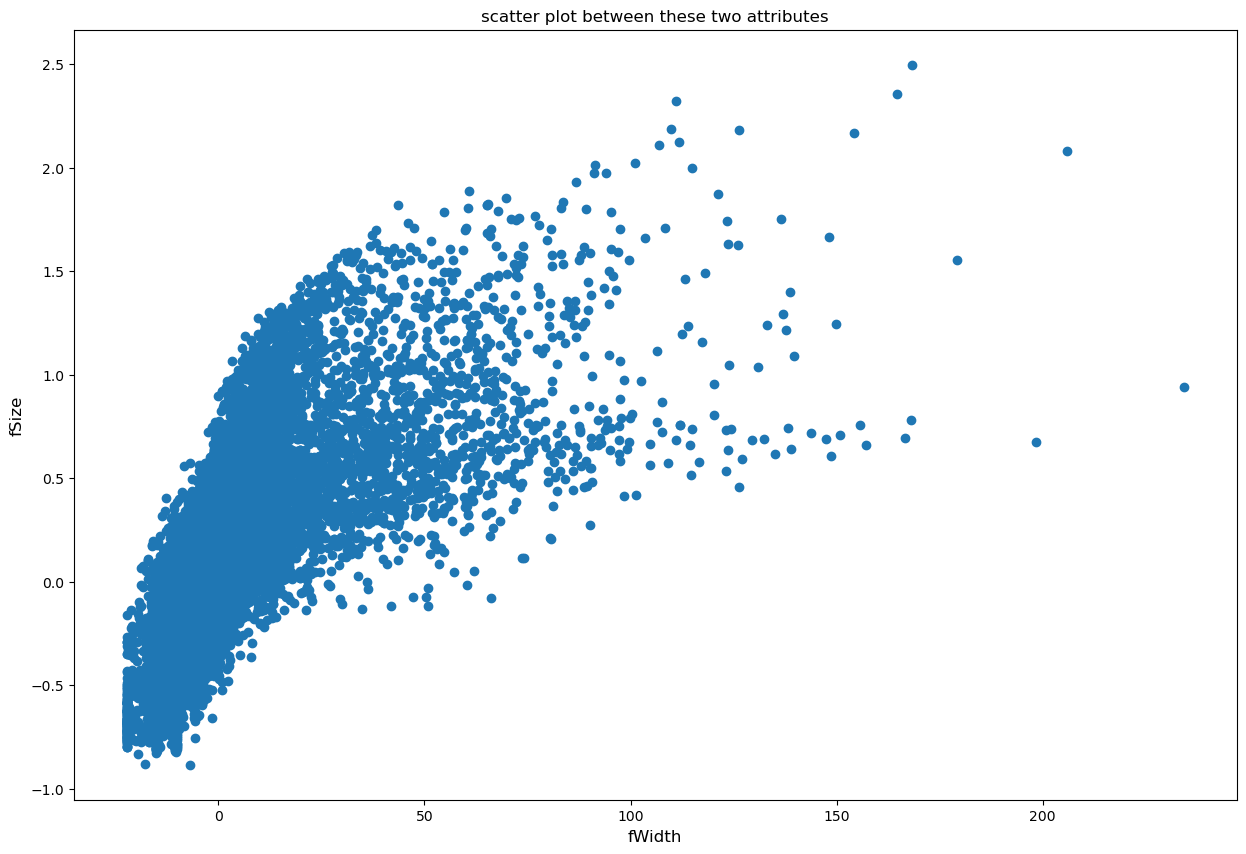

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
my_plot(ax)
plt.show()


## Task 5

In [17]:
mean = df.iloc[:, 1].mean()
mean

22.180966219768667

In [18]:
variance = df.iloc[:, 1].var()
variance

336.57778160431974

In [19]:
standard_deviation = df.iloc[:, 1].std()
standard_deviation

18.346056295681635

In [20]:
print(standard_deviation ** 2 == variance)

True


In [21]:
from scipy.stats import norm

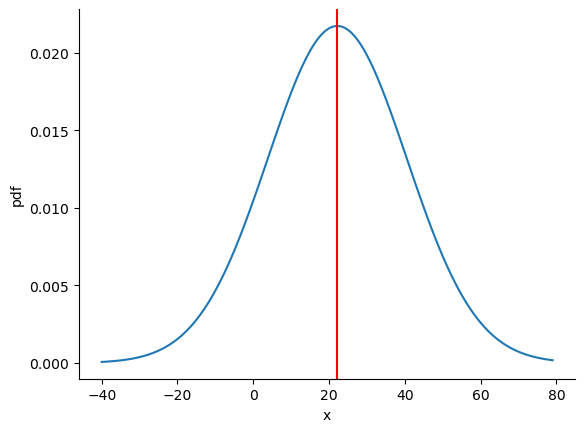

In [22]:
xaxis = np.arange(-40, 80, 1)
yaxis = norm.pdf(xaxis, mean, standard_deviation)
plt.plot(xaxis, yaxis)
plt.xlabel('x')
plt.ylabel('pdf')
plt.axvline(mean, c='r')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


## Task 6

In [23]:
df.var().argmax()

9

In [24]:
df.var().idxmax()

'fDist'

In [25]:
df.var().max()

5584.839982703803

In [26]:
df.var().argmin()

4

In [27]:
df.var().idxmin()

'fConc1'

In [28]:
df.var().min()

0.012212636673948844

## Task 7

In [29]:
cov_matrix = inner_product

In [30]:
max_pair = (0, 1)
max_value = cov_matrix.iloc[0, 1]

for i in range(d):
    for j in range(i+1, d):
        if cov_matrix.iloc[i, j] > max_value:
            max_value = cov_matrix.iloc[i, j]
            max_pair = i, j

print(max_pair, max_value)

(0, 9) 1324.7944745035525


In [31]:
min_pair = (0, 1)
min_value = cov_matrix.iloc[0, 1]

for i in range(d):
    for j in range(i+1, d):
        if cov_matrix.iloc[i, j] < min_value:
            min_value = cov_matrix.iloc[i, j]
            min_pair = i, j

print(min_pair, min_value)

(0, 5) -924.3854997097343
